In [202]:

import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)
import numpy as np
import os, sys
from astropy.io import fits
from astropy.stats import sigma_clip
import warnings
from mpl_toolkits.axes_grid1 import make_axes_locatable

## Begin loop to read into BIAS files  

In [203]:
cd

C:\Users\speco


In [204]:
files = os.listdir('astro136/DATA/BIAS')

print(files)

['Project1_SB.00000002.BIAS.fits', 'Project1_SB.00000003.BIAS.fits', 'Project1_SB.00000004.BIAS.fits', 'Project1_SB.00000005.BIAS.fits', 'Project1_SB.00000006.BIAS.fits', 'Project1_SB.00000007.BIAS.fits', 'Project1_SB.00000008.BIAS.fits', 'Project1_SB.00000009.BIAS.fits', 'Project1_SB.00000010.BIAS.fits', 'Project1_SB.00000011.BIAS.fits', 'Project1_SB.00000012.BIAS.fits', 'Project1_SB.00000013.BIAS.fits', 'Project1_SB.00000014.BIAS.fits', 'Project1_SB.00000015.BIAS.fits', 'Project1_SB.00000016.BIAS.fits', 'Project1_SB.00000017.BIAS.fits', 'Project1_SB.00000018.BIAS.fits', 'Project1_SB.00000019.BIAS.fits', 'Project1_SB.00000020.BIAS.fits', 'Project1_SB.00000021.BIAS.fits']


In [205]:
cd astro136/DATA/BIAS

C:\Users\speco\astro136\DATA\BIAS


In [206]:

#warnings.filterwarnings("ignore")

biasdata_unclipped = np.zeros((510, 765, len(files)))
biasdata = sigma_clip(biasdata_unclipped)

for i in range(len(files)):
        hdul = fits.open(files[i])
        if not hdul[0].header['EXPTIME']:
            biasdata[:,:, i] = hdul[0].data
biasmastermean = np.mean(biasdata, axis = 2)
biasmastermedian = np.median(biasdata, axis = 2)
biasmasterstd = np.std(biasdata, axis = 2)

In [207]:
print(biasdata_unclipped.shape)
print(biasdata.shape)

#print(biasmasterstd)

(510, 765, 20)
(510, 765, 20)


In [208]:
print('biasmastermean = ', biasmastermean)

biasmastermean =  [[127.9 126.85 127.8 ... 106.95 107.1 106.1]
 [125.15 126.45 126.25 ... 103.9 103.45 105.45]
 [126.65 127.4 123.95 ... 104.4 107.2 103.5]
 ...
 [127.45 126.6 127.45 ... 106.4 104.35 105.65]
 [127.0 128.0 126.35 ... 108.45 105.55 109.65]
 [128.0 127.4 124.45 ... 107.5 105.75 109.2]]


In [228]:
print('biasdata.shape =', biasdata.shape)
print('biasmastermean.shape =', biasmastermean.shape)
print(biasmastermean)

biasdata.shape = (510, 765, 20)
biasmastermean.shape = (510, 765)
[[127.9 126.85 127.8 ... 106.95 107.1 106.1]
 [125.15 126.45 126.25 ... 103.9 103.45 105.45]
 [126.65 127.4 123.95 ... 104.4 107.2 103.5]
 ...
 [127.45 126.6 127.45 ... 106.4 104.35 105.65]
 [127.0 128.0 126.35 ... 108.45 105.55 109.65]
 [128.0 127.4 124.45 ... 107.5 105.75 109.2]]


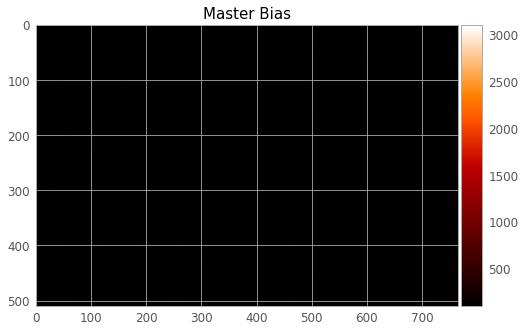

In [210]:

ax = plt.subplot(111)
im = ax.imshow(biasmastermean)
plt.title('Master Bias', loc= 'center', fontsize=15)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

plt.colorbar(im, cax=cax)


plt.show()

## Loop to read into Dark files

In [211]:
cd 

C:\Users\speco


In [212]:
filesDARK = os.listdir('astro136/DATA/DARK')

print(filesDARK)

['Project1_SB.00000027.DARK.fits', 'Project1_SB.00000028.DARK.fits', 'Project1_SB.00000029.DARK.fits', 'Project1_SB.00000030.DARK.fits', 'Project1_SB.00000031.DARK.fits', 'Project1_SB.00000032.DARK.fits', 'Project1_SB.00000033.DARK.fits', 'Project1_SB.00000034.DARK.fits', 'Project1_SB.00000035.DARK.fits', 'Project1_SB.00000036.DARK.fits', 'Project1_SB.00000037.DARK.fits', 'Project1_SB.00000038.DARK.fits', 'Project1_SB.00000039.DARK.fits', 'Project1_SB.00000040.DARK.fits', 'Project1_SB.00000041.DARK.fits', 'Project1_SB.00000042.DARK.fits', 'Project1_SB.00000043.DARK.fits', 'Project1_SB.00000044.DARK.fits', 'Project1_SB.00000045.DARK.fits', 'Project1_SB.00000046.DARK.fits', 'Project1_SB.00000047.DARK.fits', 'Project1_SB.00000048.DARK.fits', 'Project1_SB.00000049.DARK.fits', 'Project1_SB.00000050.DARK.fits', 'Project1_SB.00000051.DARK.fits', 'Project1_SB.00000052.DARK.fits', 'Project1_SB.00000053.DARK.fits', 'Project1_SB.00000054.DARK.fits', 'Project1_SB.00000055.DARK.fits', 'Project1_SB.

In [213]:
cd astro136/DATA/DARK

C:\Users\speco\astro136\DATA\DARK


In [214]:
darkdata_unclipped = np.zeros((510, 765, len(filesDARK)))
darkdata = sigma_clip(darkdata_unclipped, sigma = 5)
exp_times =  []
for i in range(len(filesDARK)):
        hdul_dark = fits.open(filesDARK[i])
        exp_time = hdul_dark[0].header['EXPTIME']
        exp_times.append(exp_time) # adds the times to the list
        if not hdul_dark[0].header['EXPTIME']:
            darkdata[:,:, i] = hdul_dark[0].data
DARKmastermean = np.mean(darkdata, axis = 2)
DARKmastermedian = np.median(darkdata, axis = 2)
DARKmasterstd = np.std(darkdata, axis = 2)
print('darkdata.shape =', darkdata.shape)
print('darkdata_unclipped.shape =', darkdata_unclipped.shape)

darkdata.shape = (510, 765, 40)
darkdata_unclipped.shape = (510, 765, 40)


In [215]:
exp_times = np.array(exp_times)
print(exp_times)
print('exp_times.shape =', exp_times.shape)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6.]
exp_times.shape = (40,)


# master dark corrected

In [216]:
print(len(filesDARK))

40


In [217]:
biasmaster = biasmastermean[:,:,None]
z = np.arange(1,41,1) # creates evenly spaced values (start, stop, step)
for i in z:
    darkreduced = darkdata - biasmaster

In [218]:
DARKMASTER = np.absolute(darkreduced/exp_time)

In [219]:
DARKMASTER.shape

(510, 765, 40)

In [220]:
DARKMASTERmean = np.mean(DARKMASTER, axis = 2)
DARKMASTERmean.shape

(510, 765)

[[21.316666666666666 21.141666666666666 21.3 ... 17.825
  17.849999999999998 17.683333333333334]
 [20.858333333333334 21.075 21.041666666666668 ... 17.316666666666666
  17.241666666666667 17.575]
 [21.108333333333334 21.233333333333334 20.658333333333335 ...
  17.400000000000002 17.866666666666667 17.25]
 ...
 [21.241666666666667 21.099999999999998 21.241666666666667 ...
  17.733333333333334 17.391666666666666 17.608333333333334]
 [21.166666666666668 21.333333333333332 21.058333333333334 ... 18.075
  17.591666666666665 18.275000000000002]
 [21.333333333333332 21.233333333333334 20.741666666666667 ...
  17.916666666666668 17.625 18.2]]


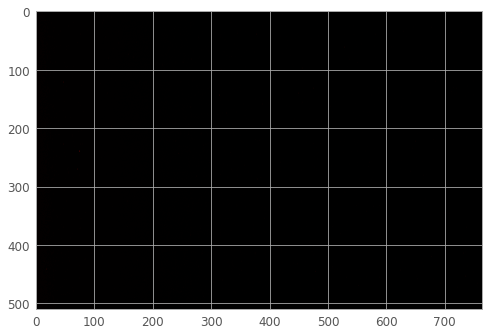

In [221]:
print(DARKMASTERmean)
plt.imshow(DARKMASTERmean)

## Master flat


In [222]:
cd

C:\Users\speco


In [223]:
filesFLATS = os.listdir('astro136/DATA/FLATS')

print(filesFLATS)

['Project1_SB.00000096.fits', 'Project1_SB.00000105.fits', 'Project1_SB.00000108.fits', 'Project1_SB.00000118.fits', 'Project1_SB.00000124.fits']


In [224]:
cd astro136/DATA/FLATS

C:\Users\speco\astro136\DATA\FLATS


In [225]:

FLATSdata = np.zeros((510, 765, len(filesFLATS))) # 5 of the twilight data files
exp_timesFLATS =  []
for i in range(len(filesFLATS)):
        hdul_FLATS = fits.open(filesFLATS[i])
        exp_timeFLATS = hdul_FLATS[0].header['EXPTIME']
        exp_timesFLATS.append(exp_timeFLATS) # adds the times to the list
        if not hdul_FLATS[0].header['EXPTIME']:
            FLATSdata[:,:, i] = hdul_FLATS[0].data
FLATSmastermean = np.mean(FLATSdata, axis = 2)
FLATSmastermedian = np.median(FLATSdata, axis =2)
FLATSmasterstd = np.std(FLATSdata, axis = 2)

In [226]:
biasmaster = biasmastermean[:,:,None]
z = np.arange(1,6,1) # creates evenly spaced values (start, stop, step)
for i in z:
    FLATSreduced = np.absolute(FLATSdata - biasmaster)

In [227]:
FLATSmaster = (FLATSreduced/exp_timesFLATS)- DARKMASTERmean

ValueError: operands could not be broadcast together with shapes (510,765,5) (510,765) 

In [ ]:
FLATSmaster.shape

In [ ]:
FLATSmastermean = np.mean(FLATSmaster, axis = 2, keepdims = True)

# Science data


In [ ]:
cd

In [ ]:
filesTWI_SKY = [f for f in os.listdir('astro136/DATA/TWI_SKY') if f.endswith('.fits')]

print(filesTWI_SKY)

In [ ]:
cd astro136/DATA/TWI_SKY

In [ ]:
TWILIGHTdata_unclipped = np.zeros((510, 765, len(filesTWI_SKY)))

TWILIGHTdata = sigma_clip(TWILIGHTdata_unclipped, sigma = 5)
exp_time_science = []
times = []
for i in range(len(filesTWI_SKY)):
        hdul_twi = fits.open(filesTWI_SKY[i])
        exp_times_science = hdul_twi[0].header['EXPTIME']
        time = hdul_twi[0].header['TIME-OBS'].split(':')
        times.append(time)
        exp_time_science.append(exp_times_science)
        exp_science = np.array(exp_time_science)
        if not hdul_twi[0].header['EXPTIME']:
            TWILIGHTdata[:,:, i] = hdul_twi[0].data
TWILIGHTmastermean = np.mean(TWILIGHTdata, axis = 2)
TWILIGHTmastermedian = np.median(TWILIGHTdata, axis = 2)
TWILIGHTmasterstd = np.std(TWILIGHTdata, axis = 2)

In [ ]:
SCIENCEMASTER = np.abs((((TWILIGHTdata - biasmaster)/exp_science)- DARKMASTERmean)/FLATSmastermean)

In [ ]:
ScienceMasterMean = np.mean(SCIENCEMASTER, axis = (0,1))

In [ ]:
logScienceMasterMean = np.log(ScienceMasterMean)

# Change the Time into seconds

In [ ]:
times = np.array(times) # change the list into an array

In [ ]:
times.shape

In [ ]:

hours = np.array(times[:,0])
minutes = np.array(times[:,1])
seconds = np.array(times[:,2])
print(len(seconds))

In [ ]:
z = np.arange(0,67,1)
print(len(z))

In [ ]:
hours_sec = []
for i in range(len(z)):
    hours_secs =  int(hours[i])
    hours_sec.append(hours_secs)
    
min_sec = []    
for i in range(len(z)):
    min_secs = int(minutes[i]) # converts specified value into integer
    min_sec.append(min_secs)


In [ ]:
SECOND = []
for i in range(len(z)):
    second = float(seconds[i]) # converts number or string into a float
    SECOND.append(second)

    #hours_to_sec = hours_sec*360
    #min_sec= min_sec*60

In [ ]:
hours_sec = np.array(hours_sec)
min_sec = np.array(min_sec)
print(hours_sec.shape)
print(min_sec.shape)

In [ ]:
HOURS_SEC = hours_sec*3600
MIN_SEC = min_sec*60
print(len(SECOND))
print(MIN_SEC.shape)
print(HOURS_SEC.shape)

In [ ]:
SEC = np.array(SECOND)
SEC.shape

In [ ]:
TIME = HOURS_SEC + MIN_SEC + SEC

In [ ]:
TIME.shape
print(TIME)

In [ ]:
TIME.shape

In [ ]:
cd astro136

# linearize data


In [ ]:
y = logScienceMasterMean
m, b = np.polyfit(TIME, y, 1)

In [ ]:
# linear function
def func(x, m, b):
    f = []
    for i in x:
        y = m*i + b
        f.append(y)
    return f

In [ ]:
y_fit = func(TIME, m, b)

In [ ]:
#plt.figure()
plt.xlabel('time (s)') 
plt.ylabel('sky brightness (counts)') 
plt.title('TWILIGHT SKY')
ax = plt.subplot(111)
plt.scatter(TIME, logScienceMasterMean, label="projected" , color = 'darkblue')
plt.plot(TIME, y_fit)
plt.savefig('BrightnessVSTime.png')
plt.show()


In [ ]:
print(ScienceMasterMean)

In [ ]:
# use a scipy package or the numpy 